### Problem 1

In [3]:
import pandas as pd

table1 = pd.read_csv('table1.csv')
table2 = pd.read_csv('table2.csv')

In [4]:
table1[(table1["sex"] == "Female" ) &  (table1["occupation"] == "Craft-repair")&  (table1["race"] == "Asian-Pac-Islander")]

,age,occupation,education,education-num,marital-status,race,sex
920,59,Craft-repair,Masters,14,Married-civ-spouse,Asian-Pac-Islander,Female
4804,49,Craft-repair,HS-grad,9,Widowed,Asian-Pac-Islander,Female
9600,33,Craft-repair,HS-grad,9,Divorced,Asian-Pac-Islander,Female
10084,28,Craft-repair,Bachelors,13,Married-spouse-absent,Asian-Pac-Islander,Female
10476,22,Craft-repair,Some-college,10,Never-married,Asian-Pac-Islander,Female
11961,25,Craft-repair,Some-college,10,Never-married,Asian-Pac-Islander,Female
12627,26,Craft-repair,Assoc-acdm,12,Married-spouse-absent,Asian-Pac-Islander,Female
14697,20,Craft-repair,11th,7,Married-spouse-absent,Asian-Pac-Islander,Female
16440,37,Craft-repair,HS-grad,9,Divorced,Asian-Pac-Islander,Female
16742,22,Craft-repair,Some-college,10,Never-married,Asian-Pac-Islander,Female


We cannot determine the marital status or education of an specific women since there are 14 anomities from table 1 alone.

In [5]:
table2[(table2["sex"] == "Female" ) &  (table2["occupation"] == "Craft-repair")&  (table2["race"] == "Asian-Pac-Islander")&(table2["native-country"] == "Philippines" )] 

,age,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
29431,59,Craft-repair,Asian-Pac-Islander,Female,0,0,35,Philippines,<=50K


However, using table 2 alone, given the search conditions, we can determine the specific person, though the table doesn't contain marital status or education, but it provides additional information like age to do more explicit search in table 1.

In [6]:
table1[(table1["sex"] == "Female" ) &  (table1["occupation"] == "Craft-repair")&  (table1["race"] == "Asian-Pac-Islander")& (table1["age"] == 59)]

,age,occupation,education,education-num,marital-status,race,sex
920,59,Craft-repair,Masters,14,Married-civ-spouse,Asian-Pac-Islander,Female


Using additional age information, we are able to determine the specific women from Table 1. This women is married and holds a master degree.

### Problem 2

Experimenting with **k-anomity, i-diversity, and t-closeness**. 

Consider a dataset, for example, with 3 ordinary attributes and 1 sensitive attribute. Let the 3 ordinary attributes be Age, Sex, and Education and the sensitive attribute be Income, each row in this dataset is of the form:

$$
    [Age, Sex, Education, Income]
$$

A hacker is interested in knowing the sensitive attribute Income. When the dataset is designed so that if complies with either **k-anomity**, **i-diversity**, and/or **t-closeness**, even if he or she somehow figures out the values of the three, the hacker may not retrive the sensitive information accurately. In general, **k-anomity** is weaker than **i-diversity**, which, in turn, is weaker than **t-closeness**.

By definition, **k-anomity** means that there is at least **k** different rows in the table of which ordinary values are a particular combination of Age, Sex, and Education. For example, the hacker knows the information of the person of interest is Age = 31, Sex = Female, and Education = BS. He or she looks into the data table and found that there are 3 rows with that combination:

$$
    [Age=31, Sex=Female, Education=BS, Income=300k]
$$
$$
    [Age=31, Sex=Female, Education=BS, Income=70k]
$$
$$
    [Age=31, Sex=Female, Education=BS, Income=20k]
$$

The hacker cannot tell accurately what the income of the person is because it can be one of the 3 values shown. This particular combination of information has 3-anomity. If every combination corresponds to at least 3 rows, then the dataset has 3-anomity.

a) Let's look at the dataset **"table3.csv"**, a simplified version of **"table1.csv"** from problem 1. Let the sensitive attribute be **education** and others be ordinary attributes. Calculate the anomity of the dataset (the value **k**). First, find all the posible combinations of the ordinary attributes that exists in the dataset. After that, determine the anomity for each combination. The anomity of the dataset is the smallest anomity among the combinations.

In [20]:
table3 = pd.read_csv('table3.csv',index_col=0)

combination_dic = table3.groupby(['age', 'race', 'sex']).size().reset_index().rename(columns = {0: 'count'})
k = combination_dic['count'].min()
print (k, "anomity")

1 anomity


**ANS: In the worst case, someone's race could be discovered.**

We can improve the **k-anomity** of the dataset by "suppressing" the ordinary attributes. Suppressing means reducing the resolution of the attribute's value. For this problem, let's suppress Age by replacing the exact age with an age range. For example, instead of leaving age = 32, replace it with age = 30-40. Apply this to **"table3.csv"** with the ranges {<20, 20-30, 30-50, >50}. Check if the anomity improves. 

In [21]:
table3_div = table3
table3_div['age range'] = pd.cut(x=table3_div['age'], bins=[0,20,30, 50, 200])
table3_div = table3_div.drop(['age'], axis = 1)
table3_div.head()

combination_dic = table3_div.groupby(['age range', 'race', 'sex']).size().reset_index().rename(columns = {0: 'count'})
k = combination_dic['count'].min()
print (k, "-anomity")

7 -anomity


**ANS: The anomity improved to 4.**

**K-anomity** is nice, however, it fails in many cases. If the rows which share a combination of ordinary attributes have only a few values for the sensitive attribute, then it is not much better than having no anomity at all. For example, consider:

$$
    [Age=31, Sex=Female, Education=BS, Income=300k]
$$
$$
    [Age=31, Sex=Female, Education=BS, Income=20k]
$$
$$
    [Age=31, Sex=Female, Education=BS, Income=20k]
$$
$$
    [Age=31, Sex=Female, Education=BS, Income=20k]
$$

When **k-anomity** fails in the second case, **i-diversity** comes to the rescue. **I-diversity** states that the rows of a particular combination of information must have at least i different values for the sensitive attribute. The above example has 2-diversity, which is not good. 

b) Calculate the diversity of the dataset **"table3.csv"**. Follow similar steps as in part a. 

In [49]:
import numpy as np

combination_dic = table3.groupby(['age', 'race', 'sex']).agg(['nunique']).reset_index()
k = combination_dic['education'].min()
print (k.iloc[0], "-diversity")

1 -diversity


For 1-anomity, i in i-diversity must be smaller than k, thus i is also 1.

Suppressing an attribute can also improve the **i-diversity** of the dataset. Repeat the suppression as in **part a** and check if the diversity improves. If it does not, consider further suppress age by using the range {<20, 20-50, >50}.

In [48]:
combination_dic_ = table3_div.groupby(['age range', 'race', 'sex']).agg(['nunique']).reset_index()
k = combination_dic_['education'].min()
print (k.iloc[0], "-diversity")

4 -diversity


**T-closeness** is even better than **i-diversity**. **T-closeness** requires that for every combination of information, the distribution of the sensitive attribute's value among the corresponding rows must be close to the overall distribution of the sensitive attribute's value for the whole dataset. Distance between distribution is calculated using the Earth Mover Distance (EMD). The dataset has **t-closeness** if no distance exceeds **t**. 

c) Calculate the overall distribution of **education**. Find the **t-closeness** of the dataset (largest distance between any combination's distribution of marital-status and the overall distribution).

You can use **scipy.stats.wasserstein_distance** to calculate the EMD.

In [55]:
from scipy.stats import wasserstein_distance

table_ = []
for i in age:
  for j in race:
    for k in sex:
      table_.append(len(table3['education'][(table3['age'] == i)& (table3['sex'] == k)& (table3['race'] == j )].unique()))

print("t-closeness of the dataset is",wasserstein_distance(table_,730*[len(table3.iloc[:,1].unique())]))

t-closeness of the dataset is 11.404109589041097


### Problem 3

(scanned in hw4_5371943.pdf)

### Problem 4 

There are 2 regression datasets given to you: "group1.csv" and "group2.csv". Both have 2 attributes and no label. Load them and store them in $X_1$ and $X_2$, respectively. 

In [40]:
import pandas as pd
import numpy as np

X1 = pd.read_csv('group1.csv', header = None)
X2 = pd.read_csv('group2.csv', header = None)

a) Run Linear Regression on each of the datasets. Are the coefficients positive or negative? Provide a plot for each dataset. 

Coefficient for group1 is [[0.89717851]] , which is positive.
Coefficient for group2 is [[1.15339068]] , which is positive.


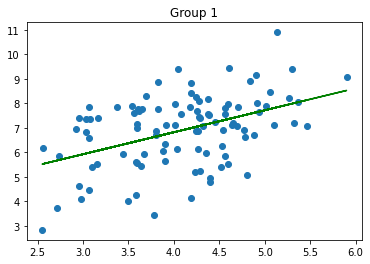

In [73]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import math

x1 = X1.iloc[:,0].values.reshape(-1,1)
y1 = X1.iloc[:,1].values.reshape(-1,1)
x2 = X2.iloc[:,0].values.reshape(-1,1)
y2 = X2.iloc[:,1].values.reshape(-1,1)

model = LinearRegression()
model.fit(x1,y1)
print("Coefficient for group1 is",model.coef_ ,", which is positive.")

model2 = LinearRegression()
model2.fit(x2,y2)
print("Coefficient for group2 is",model2.coef_ ,", which is positive.")

plt.scatter(x1,y1)
plt.title('Group 1')
plt.plot(x1, model.intercept_ + model.coef_ * x1, color= 'green')

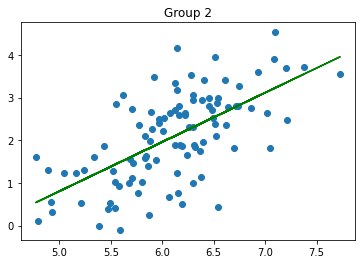

In [72]:
plt.scatter(x2,y2)
plt.title('Group 2')
plt.plot(x2, model2.intercept_ + model2.coef_ * x2, color= 'green')

b) Now combine both datasets into a single large dataset. Call this dataset $X$ ($X=X_1 \cup X_2$). Again, run Linear Regression on the combined dataset $X$. Is the coefficient positive or negative? Provide a plot. 

Coefficient for union group is [[-1.38439504]] , which is negative


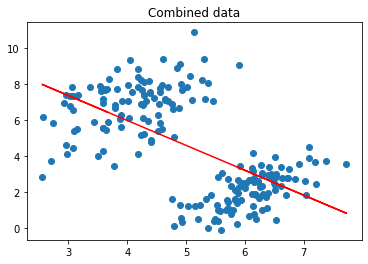

In [71]:
X_u = pd.concat([X1, X2])
x3 = X_u.iloc[:,0].values.reshape(-1,1)
y3 = X_u.iloc[:,1].values.reshape(-1,1)
model3 = LinearRegression()
model3.fit(x3,y3)

print("Coefficient for union group is",model3.coef_ ,", which is negative")
plt.scatter(x3,y3)
plt.title('Combined data')
plt.plot(x3, model3.intercept_ + model3.coef_ * x3, color= 'red')

c) What is the name of this illustrated paradox? What do the above results tell us about modeling the relationship between two variables in the presence of a missing attribute? To give you some intuition, imagine there is a third unobserved attribute $Z$ that has different values depending on which group an example belongs to. In other words, every data point in $X_1$ has $Z=1$ and every data point in $X_2$ has $Z=2$. Attribute $Z$ essentially partitions the whole dataset $X$ into 2 subsets $X_1$ and $X_2$.  

**ANS: Simpson’s paradox. The above results tell us the relationship observed from multiple groups maybe reverse or disordered. In the presence of a missing attribute will stratify the partitions to different groups with labels that would identify their relationship.**

### Problem 5 



(scanned in hw4_5371943.pdf)